# Introduction to Marketing Mix Modeling

This is the first part of the project and in this notebook it is shown a simple version of the Marketing Mix Modeling, ergo, an introduction of this analysis.

## Importing Libraries

In first place, the libraries are imported.

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import datetime as dt

import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

## Loading Data

Then, the data is loaded to be used in the Notebook and a random previsualization of 5 rows is shown.

In [2]:
URL_DATA = 'https://raw.githubusercontent.com/IsaacIsaias/DS-marketing-mix-modeling/main/data/mmm.csv'
mmm_df = pd.read_csv(URL_DATA)

In [3]:
mmm_df.sample(5)

,Date,TV,Radio,Banners,Sales
22,2018-06-10,0.0,0.00,1679.63,10134.70
149,2020-11-15,0.0,0.00,1769.21,8095.38
107,2020-01-26,0.0,7021.04,0.00,10862.91
139,2020-09-06,0.0,0.00,0.00,5991.27
172,2021-04-25,0.0,0.00,2139.88,10895.22


## Exploratory Data Analysis (EDA)

This dataset contains the following 5 data variables:

|  **VARIABLE**  | **DESCRIPTION** |
| :--- || 
| Date | Weekdate when the promotion ends |
| TV | TV advertising budget  *(in Millions)* |
| Banners | Banners advertising budget *(in Millions)* |
| Radio | Radio advertising budget *(in Millions)* |
| Sales | Total sales *(in Millions)* |

Where, 'Date' is a time variable and others four are numeric variables.

In [4]:
mmm_df.shape

(200, 5)

In [5]:
mmm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     200 non-null    object 
 1   TV       200 non-null    float64
 2   Radio    200 non-null    float64
 3   Banners  200 non-null    float64
 4   Sales    200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


We can observe that this dataframe has 200 total entries in 5 categories, where there is not null data.
Also we can see that the 'Date' column has an erroneous Dtype object, so it is necessary to correct that format and rename the column to 'Weekdate' to make it more readable.

In [6]:
mmm_df.rename(columns={'Date': 'WeekDate'}, inplace=True)
mmm_df['WeekDate'] = pd.to_datetime(mmm_df['WeekDate'])
mmm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   WeekDate  200 non-null    datetime64[ns]
 1   TV        200 non-null    float64       
 2   Radio     200 non-null    float64       
 3   Banners   200 non-null    float64       
 4   Sales     200 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.9 KB


Then, it is set the column 'Weekdate' as the index of the dataframe.

In [7]:
mmm_df.set_index("WeekDate", inplace=True)
mmm_df

,TV,Radio,Banners,Sales
WeekDate,,,,
2018-01-07,13528.10,0.00,0.00,9779.80
2018-01-14,0.00,5349.65,2218.93,13245.19
2018-01-21,0.00,4235.86,2046.96,12022.66
2018-01-28,0.00,3562.21,0.00,8846.95
2018-02-04,0.00,0.00,2187.29,9797.07
...,...,...,...,...
2021-10-03,0.00,0.00,1691.68,9030.17
2021-10-10,11543.58,4615.35,2518.88,15904.11
2021-10-17,0.00,4556.16,1919.19,12839.29


In [8]:
mmm_df.describe()

,TV,Radio,Banners,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,2946.207650,2213.585050,1520.722550,10668.141500
std,4749.646908,2505.967886,870.764354,2700.706683
min,0.000000,0.000000,0.000000,4532.330000
25%,0.000000,0.000000,1657.195000,8396.942500
50%,0.000000,0.000000,1918.990000,10853.105000
75%,7938.527500,4624.027500,2069.767500,12566.995000
max,13901.550000,7696.220000,2518.880000,17668.340000


## Generating Profile Report

In [9]:
gral_report = ProfileReport(mmm_df, title="General Report from the Marketing Mix Model", explorative=True)
gral_report.to_file("mmm-report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Profiling is an extension of the pandas function 'describe()', so it is quicker to make data analysis.
The general report is saved in an HTML document as 'mmm-report.html'.

After the data analysis we can see that almost the 70% of the total weeks there is not TV advertising and approximately a lit bit plus of the half there isn't the radio one.

Banner advertising is the most recurrent with a presence in 76% of the total weeks.


Now, after this fast analysis, to get a better understanding of the relationships between the different variables, its necesary to make graphs, specially a correlation matrix.  

In [10]:
mmm_corr = mmm_df.corr()
mmm_corr

,TV,Radio,Banners,Sales
TV,1.000000,0.084128,0.021735,0.679205
Radio,0.084128,1.000000,-0.100946,0.466762
Banners,0.021735,-0.100946,1.000000,0.360046
Sales,0.679205,0.466762,0.360046,1.000000


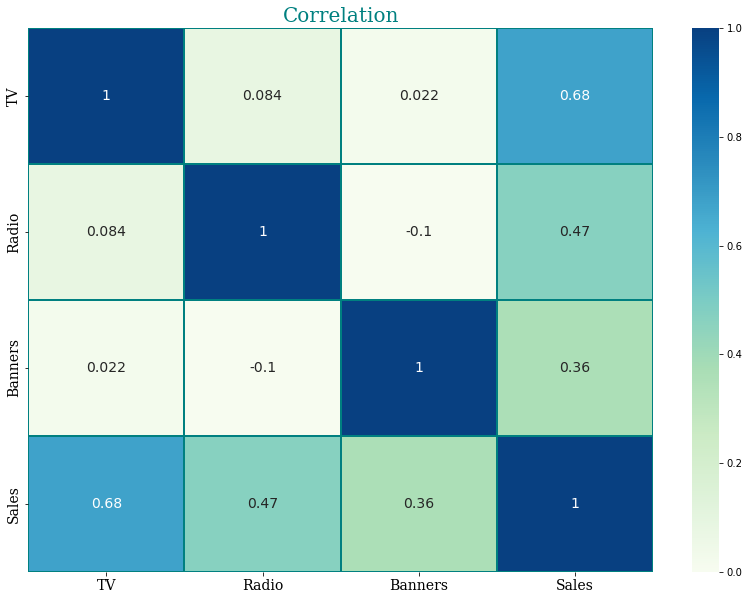

In [11]:
%matplotlib inline
plt.figure(figsize=(14,10))
sns.heatmap(mmm_corr, annot = True, annot_kws={"size": 14}, vmin=0, cmap='GnBu', cbar=True, linewidths=0.1, linecolor='teal')
plt.title("Correlation", fontdict={'family':'serif', 'color':'teal', 'size':20})
plt.xticks(ticks=np.arange(4) + 0.5, labels=mmm_corr.columns, family='serif', size=14)
plt.yticks(ticks=np.arange(4) + 0.5, labels=mmm_corr.columns, family='serif', size=14)
plt.show(sns)

The correlation matrices above show that there’s a medium/strong correlation between TV and sales (0.68), a moderate correlation between radio and sales (0.47), and a weak/medium correlation between banners and sales (0.36).

Next, three scatter plots are shown simply to visualize the relationship between TV, Radio and Banners with the Sales of the WeekDates.
Also a pair plot matrix is shown to visualize the other relationships.

In [12]:
alt.Chart(mmm_df).mark_circle().encode(
    x='TV',
    y='Sales',
    tooltip=[alt.Tooltip('Sales', title='Ventas de la semana',format='~s')]
).interactive()

alt.Chart(...)

In [13]:
alt.Chart(mmm_df).mark_circle().encode(
    x='Radio',
    y='Sales',
    tooltip=[alt.Tooltip('Sales', title='Ventas de la semana',format='~s')]
).interactive()

alt.Chart(...)

In [14]:
alt.Chart(mmm_df).mark_circle().encode(
    x='Banners',
    y='Sales',
    tooltip=[alt.Tooltip('Sales', title='Ventas de la semana',format='~s')]
).interactive()

alt.Chart(...)

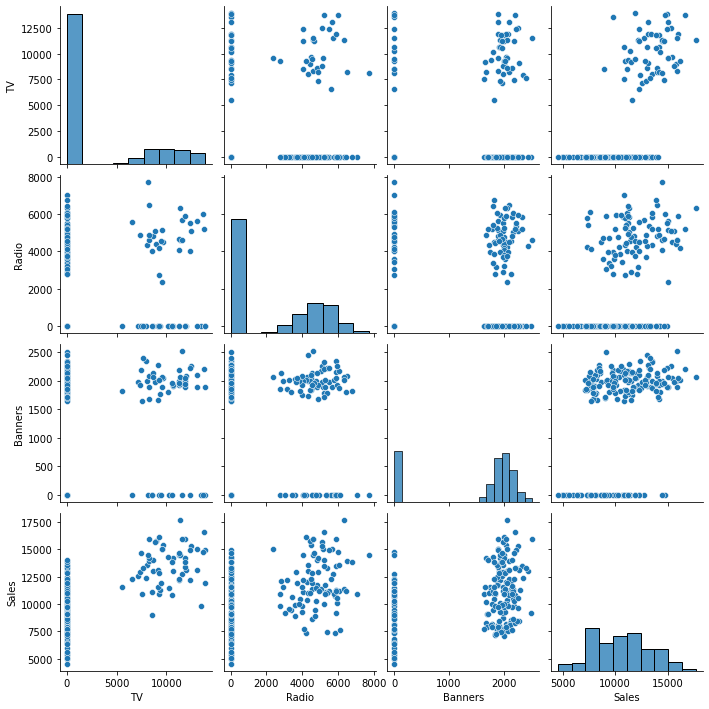

In [15]:
sns.pairplot(mmm_df)
plt.show(sns)

It exists a strong relationship between TV and Sales and also a medium between Radio and Sales. Another fact is that apparently the banners are useless because all the investments are in a small range and the Sales are so assorted.

## Multiple Linear Regression Model

- The main goal is to build a model where, in a specific WeekDate, is possible to know how much of the Sales was generated by TV, how much by Radio and by Banners; and what is the Baseline.

The formula to use is:
\\[Sales = f\left(x_{TV}\right) + g\left(x_{Radio}\right) + h\left(x_{Banners}\right) + Base\\]

Where **Sales** is only the total sum of the three different functions for its respective advertising spendings and **Base** is the Baseline.

In first place, the dataframe is called.

In [16]:
mmm_df

,TV,Radio,Banners,Sales
WeekDate,,,,
2018-01-07,13528.10,0.00,0.00,9779.80
2018-01-14,0.00,5349.65,2218.93,13245.19
2018-01-21,0.00,4235.86,2046.96,12022.66
2018-01-28,0.00,3562.21,0.00,8846.95
2018-02-04,0.00,0.00,2187.29,9797.07
...,...,...,...,...
2021-10-03,0.00,0.00,1691.68,9030.17
2021-10-10,11543.58,4615.35,2518.88,15904.11
2021-10-17,0.00,4556.16,1919.19,12839.29


In *x* the predictor variables are left and in *y* the variable to predict is left.

In [17]:
x = mmm_df.drop(columns=['Sales'])
x

,TV,Radio,Banners
WeekDate,,,
2018-01-07,13528.10,0.00,0.00
2018-01-14,0.00,5349.65,2218.93
2018-01-21,0.00,4235.86,2046.96
2018-01-28,0.00,3562.21,0.00
2018-02-04,0.00,0.00,2187.29
...,...,...,...
2021-10-03,0.00,0.00,1691.68
2021-10-10,11543.58,4615.35,2518.88
2021-10-17,0.00,4556.16,1919.19


In [18]:
y = mmm_df['Sales']
y

WeekDate
2018-01-07     9779.80
2018-01-14    13245.19
2018-01-21    12022.66
2018-01-28     8846.95
2018-02-04     9797.07
                ...   
2021-10-03     9030.17
2021-10-10    15904.11
2021-10-17    12839.29
2021-10-24     9063.45
2021-10-31     7250.21
Name: Sales, Length: 200, dtype: float64

Then, the linear regression model is implemented.

In [19]:
lr = LinearRegression()
print(cross_val_score(lr, x, y, cv=TimeSeriesSplit()))

[0.69594303 0.69302285 0.66850729 0.78807363 0.73512387]


In [20]:
lr.fit(x, y)
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [0.35968382 0.48833246 1.2159193 ]
Intercept: 6678.396933606162


So, the multiple linear regression model is:
\\[Sales = 0.36\left(x_{TV}\right) + 0.49\left(x_{Radio}\right) + 1.22\left(x_{Banners}\right) + 6678.40\\]

Then, the coeffiecients and the interception are saved in its respective variables. After that, a new dataframe is created with the condition that there are spendings in each advertising at the end of a week. 

In [21]:
coef_TV = lr.coef_[0]
coef_Radio = lr.coef_[1]
coef_Banners = lr.coef_[2]
Base = round(lr.intercept_, 2)

In [22]:
three_budgets_mmm_df = mmm_df[(mmm_df['TV'] > 0.) & (mmm_df['Radio'] > 0.) & (mmm_df['Banners'] > 0.)]
three_budgets_mmm_df

,TV,Radio,Banners,Sales
WeekDate,,,,
2018-02-11,8045.44,4310.55,1992.98,13527.65
2018-02-25,9697.29,4478.81,2042.30,15355.11
2018-05-06,9589.68,5160.93,1889.49,15013.62
2018-05-20,8291.81,4605.15,1897.94,15918.14
2018-07-22,13065.56,5643.31,1898.93,15010.94
2018-12-23,8209.07,6466.58,2089.64,13966.11
2019-01-06,8978.39,4401.35,1997.03,15742.61
2019-03-03,8655.08,4814.95,2144.62,14012.71
2019-03-10,9280.89,4192.35,2004.92,16127.45


In [23]:
time = three_budgets_mmm_df.iloc[-1].name.strftime('%Y-%m-%d')
time

'2021-10-10'

The last row index is selected and now it's turn to obtain the sales predict and its correction factor.

In [24]:
TV = mmm_df.loc[f'{time}']['TV']
Radio = mmm_df.loc[f'{time}']['Radio']
Banners = mmm_df.loc[f'{time}']['Banners']
Sales = mmm_df.loc[f'{time}']['Sales']
Sales_Predict = (coef_TV * TV) + (coef_Radio * Radio) + (coef_Banners * Banners) + Base

print('Sales:', Sales)
print('Sales Predict:', Sales_Predict)

Sales: 15904.11
Sales Predict: 16147.019007977424


In [25]:
Correction_Factor = Sales / Sales_Predict
correct_fact = Correction_Factor
correct_fact

0.984956417784768

In [26]:
contr_TV = round(TV * (coef_TV * correct_fact), 3)
contr_Radio = round(Radio * (coef_Radio * correct_fact), 3)
contr_Banners = round(Banners * (coef_Banners * correct_fact), 3)
contr_Base = round(Base * correct_fact, 3)

print('TV Contribution:' , contr_TV)
print('Radio Contribution:', contr_Radio)
print('Banners Contribution:', contr_Banners)
print('Base Contribution:', contr_Base)

Sales_Predict_Factor = contr_TV + contr_Radio + contr_Banners + contr_Base

print('\nSales Predict w Factor:', Sales_Predict_Factor)
print('Sales', Sales)

TV Contribution: 4089.577
Radio Contribution: 2219.92
Banners Contribution: 3016.68
Base Contribution: 6577.933

Sales Predict w Factor: 15904.11
Sales 15904.11


A contribution plot for the contributions is the following one:

In [27]:
weights = pd.Series(
    lr.coef_,
    index=x.columns
)
weights

TV         0.359684
Radio      0.488332
Banners    1.215919
dtype: float64

In [28]:
base = lr.intercept_
base

6678.396933606162

Here, simply the columns are multiplied by their weights, or the linear regression coefficients; and the **Base** is established like a constant, in other words, is the linear regression interception.

In [29]:
unadj_contributions = x.mul(weights).assign(Base=base)
unadj_contributions.head()

,TV,Radio,Banners,Base
WeekDate,,,,
2018-01-07,4865.838699,0.000000,0.000000,6678.396934
2018-01-14,0.000000,2612.407764,2698.039815,6678.396934
2018-01-21,0.000000,2068.507949,2488.938173,6678.396934
2018-01-28,0.000000,1739.542785,0.000000,6678.396934
2018-02-04,0.000000,0.000000,2659.568129,6678.396934


To adjust the contributions, all the contributions of a row, **WeekDate**, are summed. Then the unadjusted contributions are divided by the last sum done and finally these are multiplied by the total sales of that **WeekDate**.

In [30]:
adj_contributions = (unadj_contributions.div(
    unadj_contributions.sum(axis=1), axis=0).mul(y, axis=0)
) # contains all contributions for each day
adj_contributions.head()

,TV,Radio,Banners,Base
WeekDate,,,,
2018-01-07,4122.137734,0.000000,0.000000,5657.662266
2018-01-14,0.000000,2886.169485,2980.775165,7378.245350
2018-01-21,0.000000,2213.360195,2663.232057,7146.067747
2018-01-28,0.000000,1828.196513,0.000000,7018.753487
2018-02-04,0.000000,0.000000,2790.326902,7006.743098


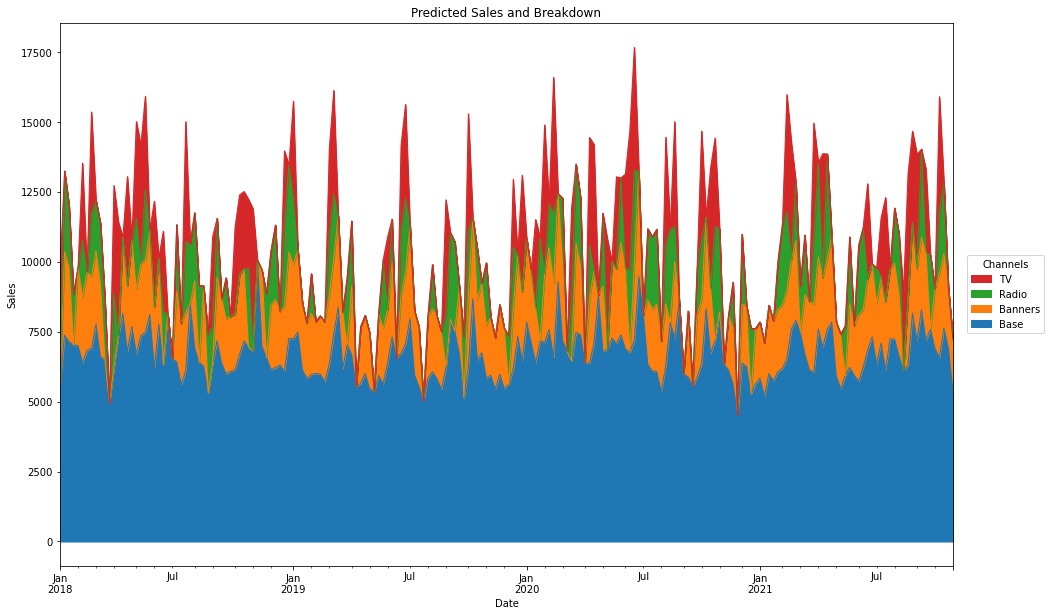

In [31]:
ax = (adj_contributions[['Base', 'Banners', 'Radio', 'TV']]
      .plot.area(
          figsize=(16, 10),
          linewidth=1,
          title='Predicted Sales and Breakdown',
          ylabel='Sales',
          xlabel='Date')
     )
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1], labels[::-1],
    title='Channels', loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)
plt.show()

After the contribution plot, it's seen that the baseline has a mean of 6500 sales per day, meanwhile radio and banners contribute about 2500 whenever they're active and finally the TV contributes 3500 when it's active.

## ROI
The return on investment is a metric that helps to understand how much profit or loss the investment has earned, ergo, measures the efficiency. Simply the ROI is calculated with the next formula:

\\[ ROI = \frac{Sales}{Spendings} \\]

Something to consider is that a ROI less than 1 means that the performing is poor.

In [32]:
sales_TV = adj_contributions['TV'].sum()
spendings_TV = mmm_df['TV'].sum()
roi_TV = round(sales_TV / spendings_TV, 4)

sales_Radio = adj_contributions['Radio'].sum()
spendings_Radio = mmm_df['Radio'].sum()
roi_Radio = round(sales_Radio / spendings_Radio, 4)

sales_Banners = adj_contributions['Banners'].sum()
spendings_Banners = mmm_df['Banners'].sum()
roi_Banners = round(sales_Banners / spendings_Banners, 4)

print('TV ROI is:', roi_TV)
print('Radio ROI is:', roi_Radio)
print('Banners ROI is:', roi_Banners)

TV ROI is: 0.3602
Radio ROI is: 0.4895
Banners ROI is: 1.2147


## Summary

In first place, it is gotten that for every \$1 inverted in:
- TV advertising, ¢36 are returned
- Radio advertising, ¢48 are returned
- Banners advertising, \$1.21 are returned

Finally, it is important to remember that this Notebook is just an introduction, is too simple, but this can be improved by making the model more complex and this is seen in the second Notebook.